In [11]:
import matplotlib.pyplot as plt
import cv2
import os
from os.path import join, basename
from collections import deque
from lane_detection import color_frame_pipeline
import numpy as np
%matplotlib inline

In [20]:
import matplotlib as mpl
mpl.__version__

'2.1.1'

In [70]:
import seaborn as sns

In [10]:
plt.style.use('ggplot')

In [7]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [67]:
data = np.array([ 0.01282051,  0.02941176, -0.03164557,  0.05,       -0.8071066,  -0.03508772
 ,-0.23076923 , 0.04255319, -0.86363636, -0.75      , -0.        , -0.
 ,-0.02564103 ,-0.02      , -0.01851852, -0.04411765, -0.        , -0.
 ,-0.03448276 ,-0.        ,  0.01388889, -0.        , -0.01111111, -0.
 , 0.01923077 ,-0.02380952, -0.78125   ,  0.02380952, -0.8       ,  0.01851852
 ,-0.07042254 ,-0.02197802, -0.01315789,  0.13461538, -0.01520913, -0.        , -0.
 ,-0.01219512 , 0.14285714,  0.1       , -0.        , -0.        , -0.05555556
 , 0.04347826 ,-0.05263158,  0.13333333, -0.        , -0.        , -0.         ,-0.
 ,-0.         ,-0.11111111,  0.11111111,  0.175     , -0.        , -0.04081633
 , 0.175      ,-0.03846154, -0.        , -0.        ,  0.01449275, -0.02272727
 , 0.06593407 ,-0.        , -0.06779661, -0.02380952,  0.01449275, -0.08163265
 ,-0.02739726 ,-0.05357143, -0.01333333, -0.04255319, -0.        , -0.
 , 0.17391304 , 0.12698413, -0.02040816,  0.02173913, -0.        ,  0.01408451
 ,-0.         ,-0.        , -0.04      , -0.        , -0.        ,  0.08333333
 ,-0.         ,-0.03571429,  0.15555556, -0.01578947,  0.03333333, -0.
 , 0.08641975 ,-0.        , -0.        ,  0.01960784,  0.02325581, -0.
 ,-0.02040816 ,-0.02272727,  0.02985075, -0.        , -0.        ,  0.11904762
 ,-0.36538462 ,-0.16      , -0.        ,  0.14754098, -0.03636364,  0.05769231
 , 0.01886792 ,-0.26      , -0.32786885, -0.        , -0.05084746, -0.03846154
 , 0.09090909 ,-0.        , -0.05      , -0.06666667, -0.02083333,  0.02439024
 ,-0.         , 0.01941748, -0.01612903, -0.27906977, -0.175     , -0.78
 ,-0.08695652 ,-0.        ,  0.03921569, -0.03125   , -0.15       , 0.04761905
 , 0.125      ,-0.03571429, -0.02439024 ,-0.        , -0.         ,-0.
 ,-0.05769231 ,-0.04761905, -0.04      , -0.        , -0.         ,-0.18
 ,-0.04255319 ,-0.        ,  0.04545455, -0.01369863, -0.         ,-0.        , -0.        ])

In [74]:
max(data)

0.17499999999999999

In [73]:
np.argmax(data)

53

In [76]:
len(np.array([]))

0

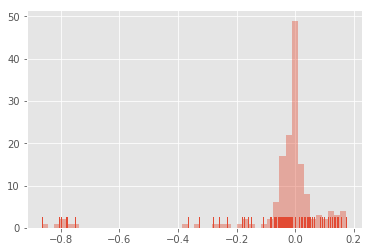

In [71]:
sns.distplot(data, kde=False, rug=True)

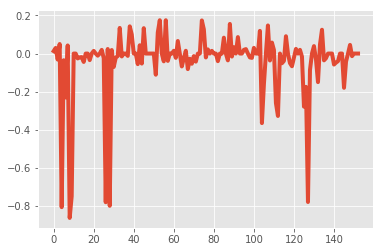

In [68]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'
plt.plot(data)

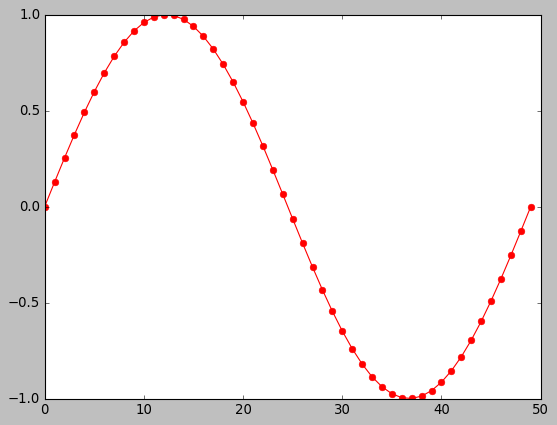

In [57]:
%timeit
with plt.style.context(('classic')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')
plt.show()

In [63]:
import time
tStart = time.time()

# test on images
test_images_dir = join('data', 'test_images')
test_images = [join(test_images_dir, name) for name in os.listdir(test_images_dir)]

for test_img in test_images:

    print('Processing image: {}'.format(test_img))

    out_path = join('out', 'images', basename(test_img))
    in_image = cv2.cvtColor(cv2.imread(test_img, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    out_image = color_frame_pipeline([in_image], solid_lines=True)
    cv2.imwrite(out_path, cv2.cvtColor(out_image, cv2.COLOR_RGB2BGR))
plt.close('all')

tEnd = time.time()
print (tEnd - tStart)

Processing image: data\test_images\solidWhiteCurve.jpg
Processing image: data\test_images\solidWhiteRight.jpg
Processing image: data\test_images\solidYellowCurve.jpg
Processing image: data\test_images\solidYellowCurve2.jpg
Processing image: data\test_images\solidYellowLeft.jpg
Processing image: data\test_images\whiteCarLaneSwitch.jpg
0.25517892837524414


In [ ]:
b = a.region_of_interest(in_image)
colorEntry = b[b.any(axis=-1)]/255
colorEntry = colorEntry[:1000,:]
T = colorEntry

f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)

ax1.scatter(colorEntry[:,0],colorEntry[:,1], s=5, c=T, alpha=1.)
ax1.set_title('RGB value distribution')
ax1.set_xlabel('R')
ax1.set_ylabel('G')
ax1.set_xlim(min(colorEntry[:,0]), max(colorEntry[:,0]))
ax1.set_ylim(min(colorEntry[:,1]), max(colorEntry[:,1]))

ax2.scatter(colorEntry[:,0],colorEntry[:,2], s=5, c=T, alpha=1.)
ax2.set_xlabel('R')
ax2.set_ylabel('B')
ax2.set_xlim(min(colorEntry[:,0]), max(colorEntry[:,0]))
ax2.set_ylim(min(colorEntry[:,2]), max(colorEntry[:,2]))

ax3.scatter(colorEntry[:,1],colorEntry[:,2], s=5, c=T, alpha=1.)
ax3.set_xlabel('G')
ax3.set_ylabel('B')
ax3.set_xlim(min(colorEntry[:,1]), max(colorEntry[:,1]))
ax3.set_ylim(min(colorEntry[:,2]), max(colorEntry[:,2]))

f.subplots_adjust(hspace=0.8)
# plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()